In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import nxviz.plots as nv
import nxviz as nv
from nxviz import annotate
from datetime import datetime

/opt/anaconda3/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [12]:
from matplotlib.pyplot import figure

In [13]:
from datetime import datetime

In [14]:
ch_01 = pd.read_csv("/Users/hernanadasme/Documents/data_challenges/data_box/challen_01.csv")
ch_01.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
ch_01.rename({'Boxers challenging H-ID': 'challenging_id'}, axis = 1, inplace=True)
ch_01.rename({'Boxer Challenged H-ID_right': 'challenged_id'}, axis = 1, inplace=True)
ch_01.rename({'rec_Title_right': 'challenged_name'}, axis = 1, inplace=True)
ch_01.rename({'rec_Title.1_left': 'challenging_name'}, axis = 1, inplace=True)
ch_01.rename({'rec_Title_left': 'challenge'}, axis = 1, inplace=True)
ch_01.head(30)

,Challenge H-ID,challenge,Source,Source year,challenging_id,challenging_name,Club Affiliation H-ID_left,rec_Title.2,challenged_id,challenged_name,Club Affiliation H-ID_right,rec_Title.1_right
0,969,Castillo\nBaeza,Semanario La Prensa. Los Andes,1928-03-02,865,"Castillo, Ernesto",NaN,NaN,836,"Baeza, Florencio",NaN,NaN
1,972,Araya\nBolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",845.0,Juan Ferriere Boxing Club,780,"Bolli, Carlos",750.0,Pedro Martínez Hnos. Boxing Club
2,975,Valdes\nPérez,Semanario La Prensa. Los Andes,1928-04-08,833,"Valdes, Mario",NaN,NaN,272,"Pérez, Amador",NaN,NaN
3,978,Ortiz\nAraya,Semanario La Prensa. Los Andes,1928-04-08,976,"Ortiz, Rafael",NaN,NaN,882,"Araya, Manuel",845.0,Juan Ferriere Boxing Club
4,985,Valdes\nGallardo,Semanario La Prensa. Los Andes,1928-04-29,833,"Valdes, Mario",NaN,NaN,827,"Gallardo, Pedro",NaN,NaN
5,986,Silva\nIñiguez,Los Sports,1924-02-01,189,"Silva, Carlos",NaN,NaN,987,"Iñiguez, Mario",NaN,NaN
6,988,Flores\nFarrafino,Los Sports,1924-03-07,302,"Flores, Sara",NaN,NaN,303,"Farrafino, Clementina",NaN,NaN
7,993,Huerta\nGiaverini,Los Sports,1924-02-01,891,"Huerta, Francisco",NaN,NaN,573,"Giaverini, Oscar",NaN,NaN
8,994,Huerta\nGiaverini,Los Sports,1924-02-01,891,"Huerta, Francisco",NaN,NaN,573,"Giaverini, Oscar",NaN,NaN
9,1000,Tapia\nInostroza,Los Sports,1924-03-07,158,"Tapia, Julio",NaN,NaN,1001,"Inostroza, Ruperto",NaN,NaN


In [16]:
ch_01.rename({'Challenge H-ID': 'challenge_id'}, axis = 1, inplace=True)
ch_01.rename({'Source': 'source'}, axis = 1, inplace=True)
ch_01.rename({'Club Affiliation H-ID_left': 'club_id_challenging'}, axis = 1, inplace=True)
ch_01.rename({'Club Affiliation H-ID_right': 'club_id_challenger'}, axis = 1, inplace=True)

In [17]:
ch_01.rename({'Source year': 'source_year'}, axis = 1, inplace=True)

In [18]:
ch_01.head()

,challenge_id,challenge,source,source_year,challenging_id,challenging_name,club_id_challenging,rec_Title.2,challenged_id,challenged_name,club_id_challenger,rec_Title.1_right
0,969,Castillo\nBaeza,Semanario La Prensa. Los Andes,1928-03-02,865,"Castillo, Ernesto",NaN,NaN,836,"Baeza, Florencio",NaN,NaN
1,972,Araya\nBolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",845.0,Juan Ferriere Boxing Club,780,"Bolli, Carlos",750.0,Pedro Martínez Hnos. Boxing Club
2,975,Valdes\nPérez,Semanario La Prensa. Los Andes,1928-04-08,833,"Valdes, Mario",NaN,NaN,272,"Pérez, Amador",NaN,NaN
3,978,Ortiz\nAraya,Semanario La Prensa. Los Andes,1928-04-08,976,"Ortiz, Rafael",NaN,NaN,882,"Araya, Manuel",845.0,Juan Ferriere Boxing Club
4,985,Valdes\nGallardo,Semanario La Prensa. Los Andes,1928-04-29,833,"Valdes, Mario",NaN,NaN,827,"Gallardo, Pedro",NaN,NaN


In [19]:
ch_01.to_csv(path_or_buf= "/Users/hernanadasme/Documents/data_challenges/data_box/ch_01.csv", index=False)

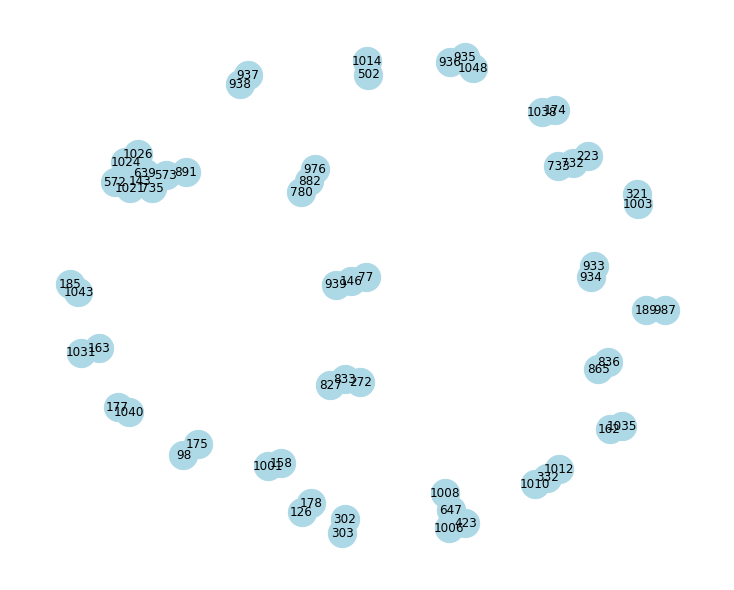

In [64]:
#alternative 3: with metadadta
B = nx.from_pandas_edgelist(ch_01, 'challenging_id', 'challenged_id')
for box,row in ch_01.iterrows():
    B.nodes[row['challenging_id']]['name'] = row['challenging_name']
    B.nodes[row['challenged_id']]['name'] = row['challenged_name']
#print(B.nodes(data=True))
#print(len(B.nodes()))
figure(figsize=(10, 8))
nx.draw(B, with_labels=True, node_color = 'lightblue', node_size = 800)

In [16]:
#alternative 3: with metadadta
C = nx.from_pandas_edgelist(ch_01, 'challenging_id', 'challenged_id')
for box,row in ch_01.iterrows():
    C.nodes[row['challenging_id']]['name'] = row['challenging_name']
    C.nodes[row['challenged_id']]['name'] = row['challenged_name']
#print(B.nodes(data=True))
print(len(C.nodes()))

61


In [28]:
ch_01['source_year'] =  pd.to_datetime(ch_01['source_year'])

In [29]:
for r, d in ch_01.iterrows():
    C.add_edge(d['challenging_id'], d['challenged_id'], date = d['source_year'])

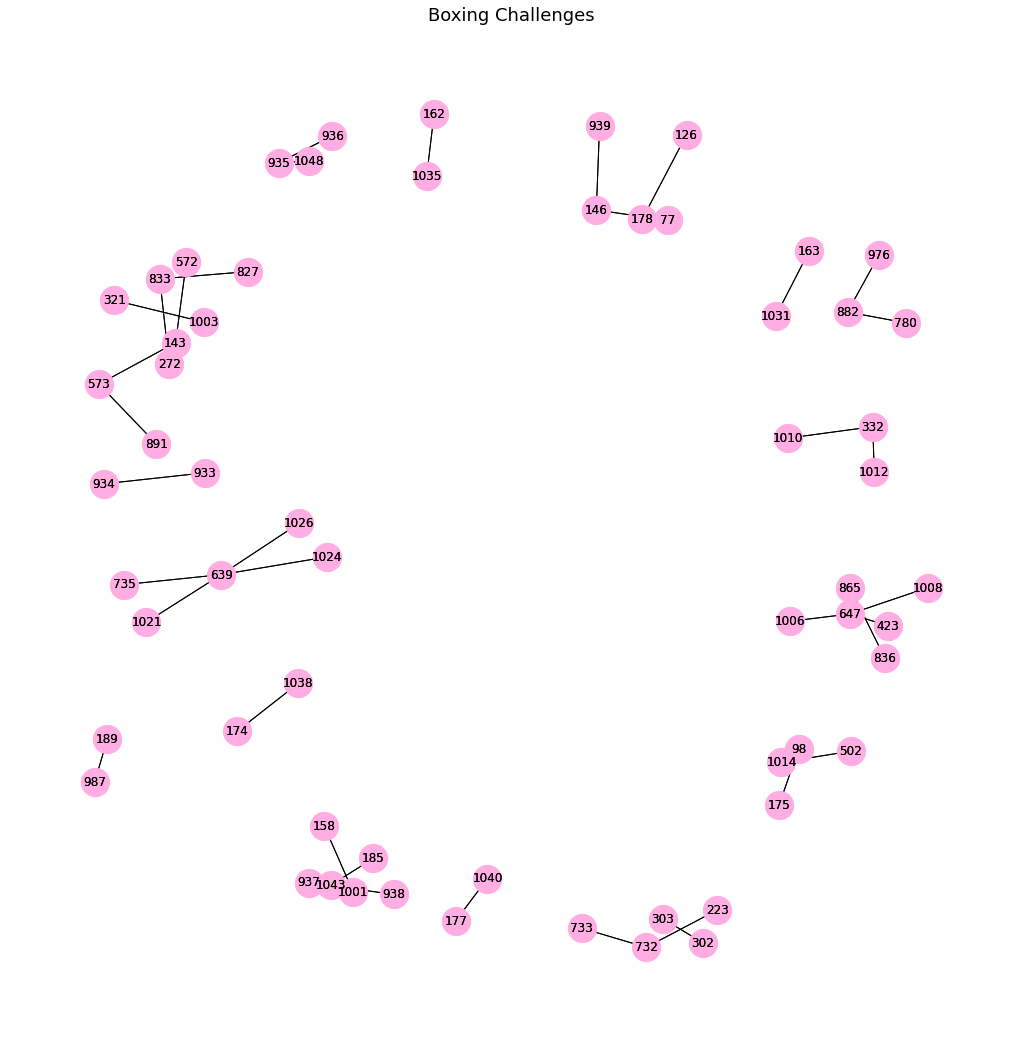

In [62]:
#FFROM DATACAMP
from datetime import datetime
# Instantiate a new graph: G_sub
C_sub = nx.Graph()
# Add nodes from the original graph
C_sub.add_nodes_from(C.nodes(data=True))
# Add edges using a list comprehension with one conditional on the edge dates.
C_sub.add_edges_from([(u, v, d) for u, v, d in C.edges(data=True) if d['date'] < datetime(1930,1,1)])
pos = nx.spring_layout(C, k =0.3)
figure(figsize=(14, 14) )
nx.draw(C, pos, with_labels = True, node_size = 800, font_size=12, node_color ='#FFADE3')
nx.draw_networkx_edges(C, pos, arrows=True, arrowsize=8, arrowstyle="->")
nx.draw_networkx_labels(C, pos, font_size=12)
plt.title('Boxing Challenges', fontsize=18)
fig1 = plt.gcf()
fig1.savefig("/Users/hernanadasme/Documents/data_challenges/graph_presentation_03.jpg", dpi=600) 


{865: Text(0.5024334414639294, -0.21937735622720045, '865'),
 836: Text(0.47715740238511656, 0.2699559258264029, '836'),
 882: Text(0.44966221913011933, 0.1795811984791788, '882'),
 780: Text(0.9330996843783507, 0.09958290937634891, '780'),
 833: Text(0.415244486504687, 0.2589419855009039, '833'),
 272: Text(0.9051807071588486, 0.2507532044529706, '272'),
 976: Text(-0.03439388357939678, 0.25503802760973054, '976'),
 827: Text(-0.07465260642348667, 0.2529079792954907, '827'),
 189: Text(0.5022955011224185, 0.2196552060268155, '189'),
 987: Text(0.1260423074607552, 0.5335343041495636, '987'),
 302: Text(0.4467145571259713, 0.31780394217405067, '302'),
 303: Text(0.014207494884627478, 0.5480725374647883, '303'),
 891: Text(0.4935990201471812, 0.6331684962769938, '891'),
 573: Text(0.03999783033251328, 0.4467141609214439, '573'),
 158: Text(0.28212071129709265, 0.4700536080362892, '158'),
 1001: Text(-0.20640063521182472, 0.5079069047327027, '1001'),
 1003: Text(0.17998632744084717, 0.517

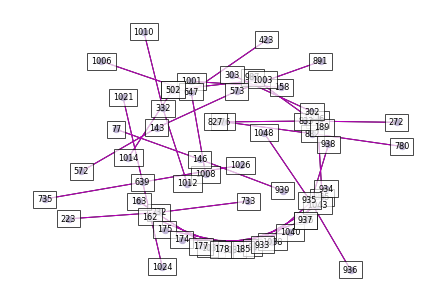

In [33]:
pos = nx.kamada_kawai_layout(C)
nx.draw(C, pos, with_labels = True, node_size = 40, font_size=5, node_color="#210070")
nx.draw_networkx_edges(C, pos, edge_color ="m")
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(C, pos, font_size=8, bbox=label_options)

<Figure size 1440x1440 with 0 Axes>

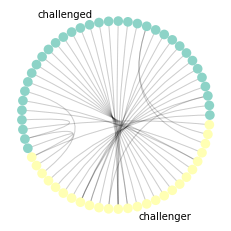

In [42]:
#import package
from nxviz import CircosPlot
, 
D = nx.Graph()
D.add_nodes_from(ch_01['challenging_id'], bipartite = 'challenger')
D.add_nodes_from(ch_01['challenged_id'], bipartite = 'challenged')
D.edges()
#To be most informative and communicative, a graph visualization should first prioritize node placement 
#in a fashion that makes sense.
c = CircosPlot(D, node_grouping = 'bipartite', node_color = 'bipartite', figsize=(12, 12))
annotate.circos_group(D, group_by="bipartite")
fig2 = plt.gcf()
fig2.savefig("/Users/hernanadasme/Documents/data_challenges/graph_presentation_04.jpg", dpi=600)


In [45]:
# 1. Create the graph
g = nx.from_pandas_edgelist(ch_01, source='challenging_id', target='challenged_id') 

In [73]:
# 2. Create a layout for our nodes 
pos = nx.spring_layout(g, k =0.3, seed=150)
pos["639"] = (1.5,1.5)

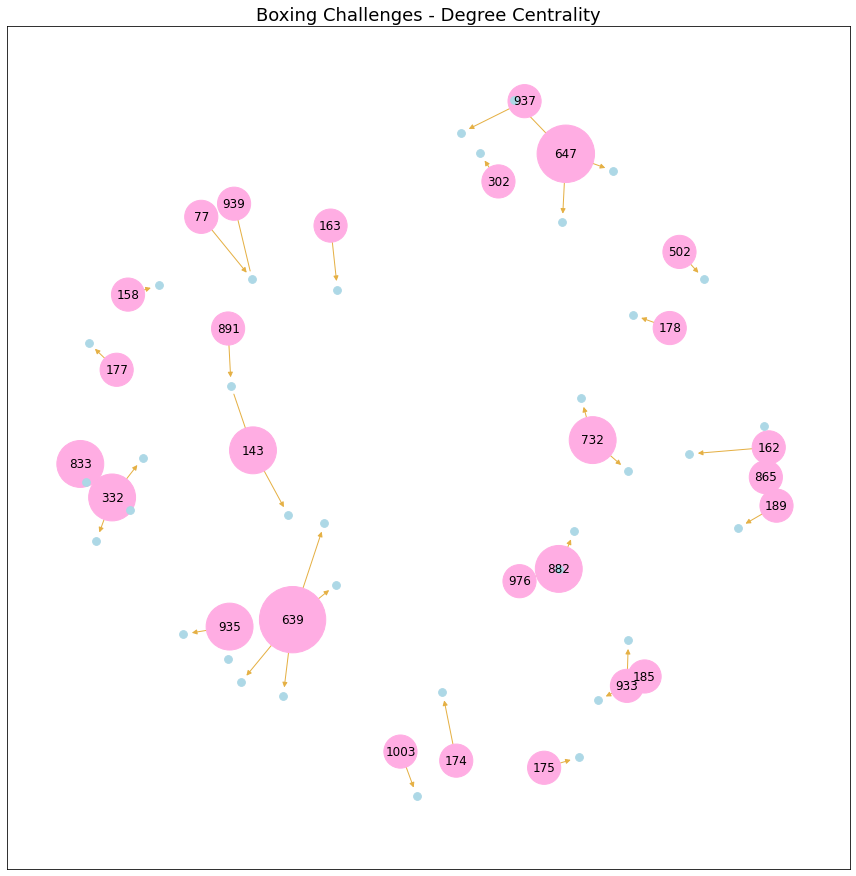

In [76]:
# 3. Draw the parts we want
fig, ax = plt.subplots(figsize=(12, 12))
nx.draw_networkx_edges(g, pos, edge_color='#E5B044',arrows=True, arrowsize=10)

challengers = [node for node in g.nodes() if node in ch_01.challenging_id.unique()]
challenged = [node for node in g.nodes() if node in ch_01.challenged_id.unique()]
size = [g.degree(node) * 1100 for node in g.nodes() if node in ch_01.challenging_id.unique()]
nx.draw_networkx_nodes(g, pos, nodelist = challengers, node_size=size, node_color ='#FFADE3')
challengers_dict = dict(zip(challengers, challengers))
nx.draw_networkx_labels(g, pos, labels=challengers_dict)
challenged_dict = dict(zip(challenged, challenged))
#nx.draw_networkx_labels(g, pos, labels=challenged_dict)

challenged = [node for node in g.nodes() if node in ch_01.challenged_id.unique()]
nx.draw_networkx_nodes(g, pos, nodelist=challenged, node_size=60, node_color ='lightblue')
#Resize figure for label readibility
fig.tight_layout()
plt.axis("on")
plt.title('Boxing Challenges - Degree Centrality', fontsize=18)
fig5 = plt.gcf()
fig5.savefig("/Users/hernanadasme/Documents/data_challenges/graph_presentations_10.jpg", dpi=600) 
plt.show()